In [4]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [5]:
#load data
google_df= pd.read_csv('job_skills.csv')
google_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [ ]:
#clean data

In [6]:
google_df_prep = google_df
google_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [7]:
pd.isnull(google_df_prep).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [8]:
google_df_prep = google_df_prep.dropna(how='any',axis='rows')

In [9]:
google_df_prep.Company.value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

In [10]:
#create new dataframe without 'YouTube'

df_prep=google_df_prep[google_df_prep.Company != 'YouTube']

In [11]:
# Checking in which category Google is hiring

df_prep.Category.value_counts()

Sales & Account Management          167
Marketing & Communications          161
Finance                             112
Technical Solutions                 100
Business Strategy                    92
People Operations                    86
User Experience & Design             83
Program Management                   72
Partnerships                         58
Product & Customer Support           48
Legal & Government Relations         43
Administrative                       39
Sales Operations                     31
Software Engineering                 24
Real Estate & Workplace Services     24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
IT & Data Management                  5
Developer Relations                   5
Technical Writing                     5
Data Center & Network                 2
Name: Category, dtype: int64

In [12]:
# What are the most popular titles of job?

df_prep.Title.value_counts()

Business Intern 2018                                              35
MBA Intern, Summer 2018                                           34
MBA Intern 2018                                                   28
BOLD Intern, Summer 2018                                          21
Field Sales Representative, Google Cloud                          17
                                                                  ..
Legal Specialist, Litigation Paralegal                             1
Manager, Technical Specialists, Google Technical Services          1
Global Supply Chain Manager, Packaging                             1
Finance Manager, Google Technical Services                         1
Payments Compliance Regulatory Licensing and Reporting Manager     1
Name: Title, Length: 761, dtype: int64

In [13]:
# create function to cleaning the text in columns 'Minimum Qualifications' , 'Preferred Qualifications' from stop words, 
# upper case, etc. 


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanText(column,x,data):
    stopwords=nltk.corpus.stopwords.words('english')
    df=data
    text=df[column].str.lower()
    text=text.str.replace(r'[^\w\s]+', '')
    text=text.str.cat(sep=' ')

    google_df_words = nltk.word_tokenize(text)

    google_df_words_freq = nltk.FreqDist(google_df_words)

    google_df_stopwords = nltk.FreqDist(w for w in google_df_words if w not in stopwords)

    countWords=google_df_stopwords.most_common(x)
    return(countWords)



In [14]:
cleanText('Minimum Qualifications',50,df_prep)


[('experience', 2965),
 ('equivalent', 1041),
 ('degree', 1037),
 ('practical', 972),
 ('babs', 811),
 ('years', 703),
 ('management', 388),
 ('ability', 359),
 ('field', 336),
 ('working', 308),
 ('related', 307),
 ('program', 299),
 ('2018', 291),
 ('english', 283),
 ('speak', 278),
 ('fluently', 277),
 ('idiomatically', 275),
 ('write', 273),
 ('science', 270),
 ('technical', 259),
 ('andor', 251),
 ('engineering', 233),
 ('computer', 228),
 ('work', 206),
 ('sales', 200),
 ('business', 180),
 ('data', 175),
 ('5', 174),
 ('development', 169),
 ('bachelors', 163),
 ('cloud', 161),
 ('design', 159),
 ('2019', 156),
 ('marketing', 150),
 ('relevant', 149),
 ('role', 146),
 ('10', 145),
 ('software', 142),
 ('technology', 141),
 ('fulltime', 140),
 ('consulting', 129),
 ('internship', 129),
 ('managing', 124),
 ('june', 123),
 ('december', 121),
 ('date', 115),
 ('must', 113),
 ('currently', 113),
 ('3', 112),
 ('graduation', 110)]

In [73]:
cleanText('Preferred Qualifications',50,df_prep)

[('experience', 2253),
 ('ability', 1820),
 ('skills', 1437),
 ('management', 692),
 ('business', 666),
 ('demonstrated', 634),
 ('excellent', 558),
 ('work', 537),
 ('communication', 516),
 ('environment', 516),
 ('strong', 462),
 ('analytical', 437),
 ('technical', 436),
 ('working', 433),
 ('knowledge', 364),
 ('technology', 355),
 ('cloud', 353),
 ('data', 351),
 ('sales', 345),
 ('understanding', 322),
 ('effective', 318),
 ('degree', 304),
 ('project', 298),
 ('interpersonal', 286),
 ('complex', 283),
 ('design', 280),
 ('marketing', 269),
 ('related', 267),
 ('organizational', 256),
 ('customer', 246),
 ('written', 246),
 ('strategic', 245),
 ('teams', 243),
 ('multiple', 240),
 ('relationships', 238),
 ('technologies', 237),
 ('andor', 235),
 ('team', 230),
 ('projects', 225),
 ('including', 221),
 ('analysis', 218),
 ('industry', 216),
 ('interest', 214),
 ('systems', 208),
 ('managing', 207),
 ('fastpaced', 205),
 ('years', 202),
 ('mba', 193),
 ('verbal', 192),
 ('engineerin

In [ ]:
# Analaysis

In [15]:
def createDict(lst,df,column):
    dct=dict((j,0) for j in lst)
    for i in lst:
        counter=df[column].str.contains(i).sum()
        if i in lst:
            dct[i]=counter
    return(dct)   

Text(0, 0.5, 'Popularity')

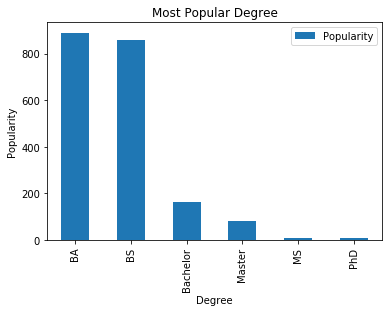

In [40]:
# use 'createDict' function to create dictionary to check how many times those words are appeared and plot it. 

lst=['BA','BS','PhD','Bachelor','MS','Master']

d=createDict(lst,df_prep,'Minimum Qualifications')

degree = sorted(d.items(), key=lambda k: k[1], reverse=True)
df_degree = pd.DataFrame(degree,columns=['Degree','Popularity'])
df_degree.plot.bar(x='Degree',y='Popularity')
plt.title('Most Popular Degree')
plt.xlabel('Degree')
plt.ylabel('Popularity')


In [16]:
lst=['graduation','internship','Bachelor']
d=createDict(lst,df_prep,'Minimum Qualifications')

stu_degree = sorted(d.items(), key=lambda k: k[1], reverse=True)
stu_degree = pd.DataFrame(stu_degree,columns=['Degree','Popularity'])

stu_degree



,Degree,Popularity
0,Bachelor,163
1,graduation,108
2,internship,96


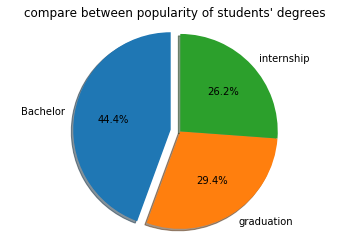

In [42]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(stu_degree['Popularity'],explode=explode,labels=stu_degree['Degree'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("compare between popularity of students' degrees")

plt.show()


In [18]:
# where are hiring for an intership

df = df_prep.loc[df_prep.Title.str.contains('Intern').fillna(False)]
df_Intern=pd.DataFrame(df)
country_ct = df_Intern["Location"].str.split(",", n = 1, expand = True)
country_ct.head()

df_Intern['Country']=country_ct[1]
df_Intern['City']=country_ct[0]

df_Intern.head(10)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,City
226,Google,"Internet of Things (IoT) Product Specialist, G...",Technical Solutions,"Paris, France",Work as part of the Sales team to identify and...,"BA/BS degree in Computer Science, related soft...",Master's degree in Computer Science or other r...,France,Paris
227,Google,"Internet of Things (IoT) Product Specialist, G...",Technical Solutions,"London, United Kingdom",Work as part of the Sales team to identify and...,"BA/BS degree in Computer Science, related soft...",Master's degree in Computer Science or other r...,United Kingdom,London
343,Google,MBA Intern (Korean-English Bilingual) 2018,Business Strategy,"Seoul, South Korea",Responsibilities vary by role.,Must be pursuing a full-time MBA program with ...,3 years of relevant work experience in the are...,South Korea,Seoul
600,Google,"BOLD Intern, Summer 2018",Finance,"New York, NY, United States",Google interns are given a lot of responsibili...,Be currently enrolled in a 4-year BA/BS progra...,Analytical skills and an interest in taking on...,"NY, United States",New York
606,Google,"Operations Manager, International and COO Comm...",Marketing & Communications,"Sunnyvale, CA, United States",Build new programs that can scale with the bus...,BA/BS degree or equivalent practical experienc...,Established media relationships and a solid un...,"CA, United States",Sunnyvale
607,Google,Business Intern 2018,Marketing & Communications,"Bucharest, Romania",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver...",Romania,Bucharest
609,Google,Business Intern 2018,Marketing & Communications,"Wrocław, Poland",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver...",Poland,Wrocław
610,Google,"MBA Intern, Summer 2018",Business Strategy,"Sunnyvale, CA, United States",Google interns are given a lot of responsibili...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...,"CA, United States",Sunnyvale
612,Google,Business Intern 2018,Marketing & Communications,"Prague, Czechia",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver...",Czechia,Prague
615,Google,Business Intern 2018,Marketing & Communications,"Zagreb, Croatia",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver...",Croatia,Zagreb


Text(0, 0.5, 'values')

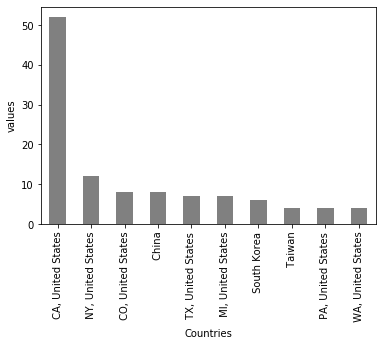

In [50]:
df_Intern['Country'].value_counts()[:10].plot.bar(color='gray')
plt.xlabel('Countries')
plt.ylabel('values')


In [47]:
lst=['graduation','internship','Bachelor']
dictIntern=createDict(lst,df_Intern,'Minimum Qualifications')

intern_degree = sorted(dictIntern.items(), key=lambda k: k[1], reverse=True)
intern_degree = pd.DataFrame(intern_degree,columns=['Degree','Popularity'])

intern_degree


,Degree,Popularity
0,graduation,107
1,internship,90
2,Bachelor,51


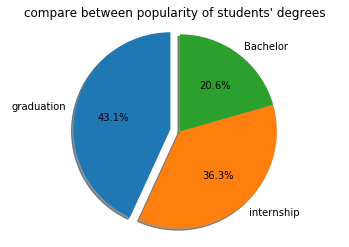

In [48]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(intern_degree['Popularity'], explode=explode,labels=intern_degree['Degree'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("compare between popularity of students' degrees")
plt.show()

Text(0, 0.5, 'Department')

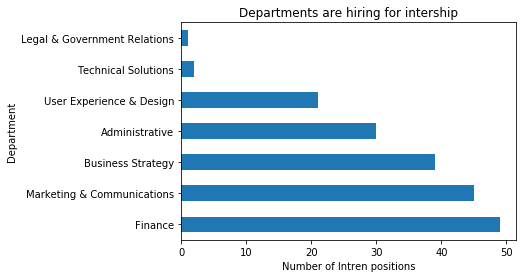

In [62]:
df_Intern['Category'].value_counts().plot(kind='barh')
plt.title('Departments are hiring for intership')
plt.xlabel('Number of Intren positions')
plt.ylabel('Department')

In [82]:
lst=['Analyst','Developer']
createDict(lst,df_Intern,'Title')

{'Analyst': 1, 'Developer': 0}

In [114]:
from wordcloud import WordCloud, ImageColorGenerator
#  The way to print WordCloud efficiently  refer to https://www.kaggle.com/justjun0321/way-to-google-get-a-job-in-goggle-word-cloud.

def wordCloud(word,text,data):
    df=data
    df_subset = df.loc[df.Title.str.contains(word).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    wordcloud = WordCloud(width = 700, height = 700,background_color="white",min_font_size=10).generate(long_text)
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()


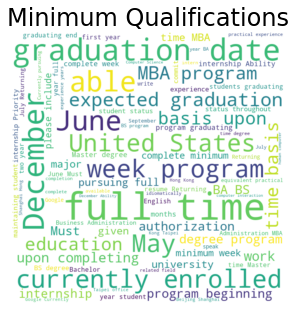

In [115]:
wordCloud('Intern','Minimum Qualifications',df_Intern)

In [45]:
df_Intern['Minimum Qualifications'].value_counts()[:10]

stopwords=nltk.corpus.stopwords.words('english')
text=df_Intern['Minimum Qualifications'].str.lower()
text=text.str.replace(r'[^\w\s]+', '')
text=text.str.cat(sep=' ')

google_df_words = nltk.word_tokenize(text)

google_df_words_dis = nltk.FreqDist(google_df_words)

google_df_stopwords_dis = nltk.FreqDist(w for w in google_df_words if w not in stopwords)

google_df_stopwords_dis.most_common(20)

[('2018', 287),
 ('program', 259),
 ('2019', 154),
 ('fulltime', 140),
 ('june', 122),
 ('internship', 122),
 ('december', 120),
 ('date', 114),
 ('currently', 111),
 ('graduation', 109),
 ('must', 106),
 ('enrolled', 101),
 ('degree', 99),
 ('able', 95),
 ('complete', 94),
 ('graduating', 86),
 ('returning', 86),
 ('may', 85),
 ('united', 83),
 ('states', 83)]

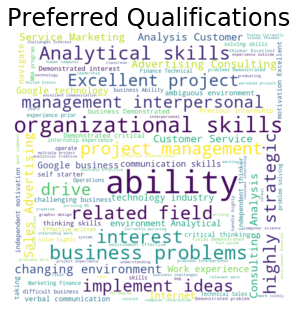

In [116]:
wordCloud('Intern','Preferred Qualifications',df_Intern)

In [55]:
df_prep.columns=['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum_Qualifications', 'Preferred_Qualifications']


df = df_prep.loc[df_prep.Minimum_Qualifications.str.contains('Bachelor').fillna(False)]
df_Bachelor=pd.DataFrame(df)

df_Bachelor['Title'].value_counts()[:20]

Business Intern 2018                                                                      35
Partner Sales Engineer, Google Cloud                                                       7
User Experience Research Intern, Summer 2018                                               6
Partner Onboarding Manager (Americas)                                                      6
User Experience Engineer Intern, Summer 2018                                               4
Mobile Web Specialist, LCS Central Europe (German)                                         3
Global Partner Business Development Manager                                                3
Head of Government Channels, Google Cloud                                                  2
Program Manager, Third Party Risk Management (3PRM)                                        2
Business Intern 2017, Australia                                                            2
Google Cloud Customer Engineer Manager, Financial Services            

Text(0, 0.5, 'Department')

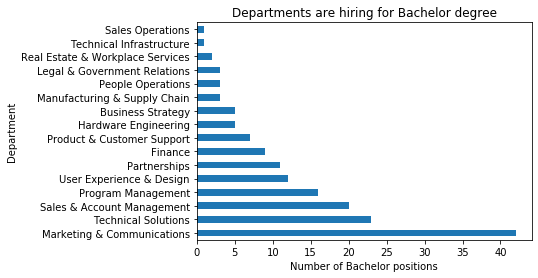

In [56]:
df_Bachelor['Category'].value_counts().plot(kind='barh')
plt.title('Departments are hiring for Bachelor degree')
plt.xlabel('Number of Bachelor positions')
plt.ylabel('Department')
    

In [58]:
df_prep.columns=['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications']

In [59]:
df = df_prep.loc[df_prep.Title.str.contains('Analyst').fillna(False)]
df_Analyst=pd.DataFrame(df)
country_ct = df_Analyst["Location"].str.split(",", n = 1, expand = True)
country_ct.head()

df_Analyst['Country']=country_ct[1]
df_Analyst['City']=country_ct[0]

df_Analyst.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,City
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,"NY, United States",New York
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...,"CA, United States",Mountain View
20,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods and work wi...,PhD in Statistics or Econometrics or a related...,Relevant industry or research experience.\nFam...,Switzerland,Zürich
85,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner with cross-functional stakeholders to ...,"PhD degree in Statistics, Econometrics, relate...",Relevant and extensive PhD research or work ex...,Switzerland,Zürich
182,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work with data sets and solve non-routine anal...,Master's degree in a quantitative discipline o...,PhD in a quantitative discipline.\nExperience ...,Switzerland,Zürich


Text(0, 0.5, 'Countries')

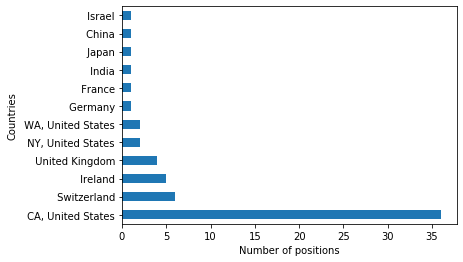

In [60]:
df_Analyst['Country'].value_counts().plot(kind='barh')
plt.xlabel('Number of positions')
plt.ylabel('Countries')

Text(0, 0.5, 'Language')

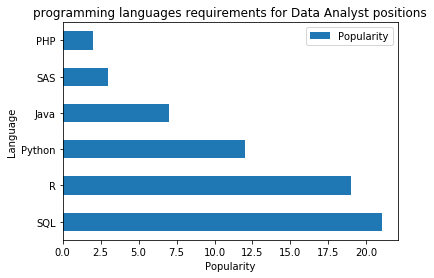

In [63]:
lst=['SQL','SAS','Python','R','PHP','Java']

d=createDict(lst,df_Analyst,'Preferred Qualifications')

language = sorted(d.items(), key=lambda k: k[1], reverse=True)
df_lang_pref = pd.DataFrame(language,columns=['Language','Popularity'])
df_lang_pref
df_lang_pref.plot.barh(x='Language',y='Popularity')
plt.title('programming languages requirements for Data Analyst positions')
plt.xlabel('Popularity')
plt.ylabel('Language')

In [176]:
lst=['BA','BS','PhD','MS','Master','graduation','internship','Bachelor']
dictAnalyst=createDict(lst,df_Analyst,'Minimum Qualifications')

analyst_degree = sorted(dictAnalyst.items(), key=lambda k: k[1], reverse=True)
analyst_degree = pd.DataFrame(analyst_degree,columns=['Degree','Popularity'])

analyst_degree

,Degree,Popularity
0,BA,42
1,BS,41
2,Bachelor,6
3,PhD,5
4,MS,4
5,Master,2
6,internship,1
7,graduation,0


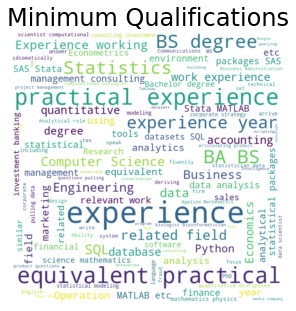

In [117]:
wordCloud('Analyst','Minimum Qualifications',df_Analyst)

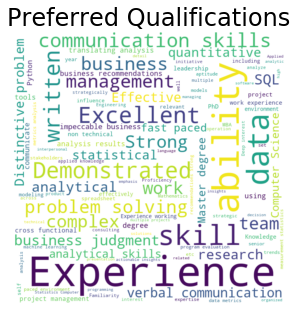

In [118]:
wordCloud('Analyst','Preferred Qualifications',df_Analyst)